In [1]:

import pandas as pd

# Load COVID-19 dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Display first 5 rows
print(df.head())



  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
df["total_cases"]

,total_cases
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
429430,266386.0
429431,266386.0
429432,266386.0
429433,266386.0


In [3]:
df['total_cases'].isnull().sum()

np.int64(17631)

In [4]:
df = df.dropna(subset=['total_cases'])


In [5]:
df['total_cases'] = df['total_cases'].fillna(method='ffill')


<ipython-input-5-583db3728a22>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['total_cases'] = df['total_cases'].fillna(method='ffill')
<ipython-input-5-583db3728a22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cases'] = df['total_cases'].fillna(method='ffill')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411804 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    411804 non-null  object 
 1   continent                                   391716 non-null  object 
 2   location                                    411804 non-null  object 
 3   date                                        411804 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 10  t

In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

#VISUALIZATIONS

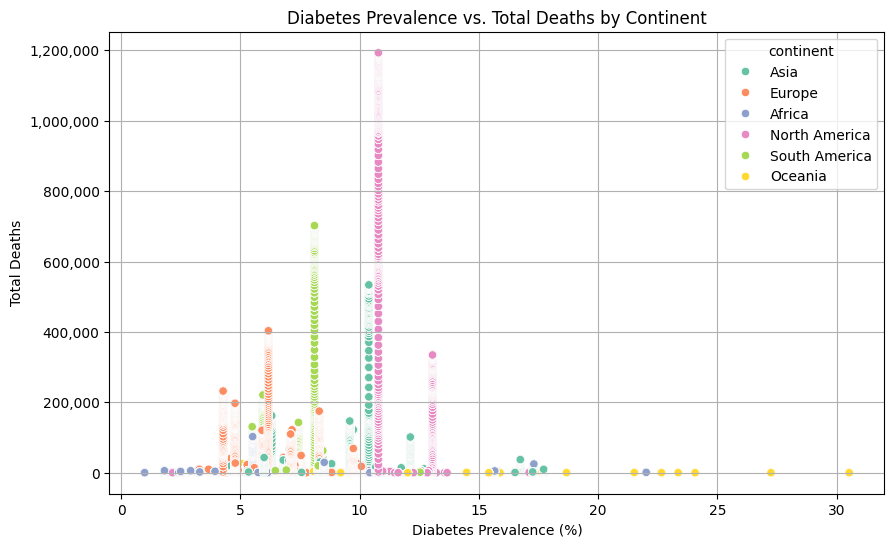

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Drop missing values to avoid errors
df_filtered = df[["diabetes_prevalence", "total_deaths", "continent"]].dropna()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="diabetes_prevalence",
    y="total_deaths",
    hue="continent",
    data=df_filtered,
    palette="Set2"
)

# Format the y-axis to show large numbers properly
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

# Labels and title
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("Total Deaths")
plt.title("Diabetes Prevalence vs. Total Deaths by Continent")
plt.grid(True)
plt.show()


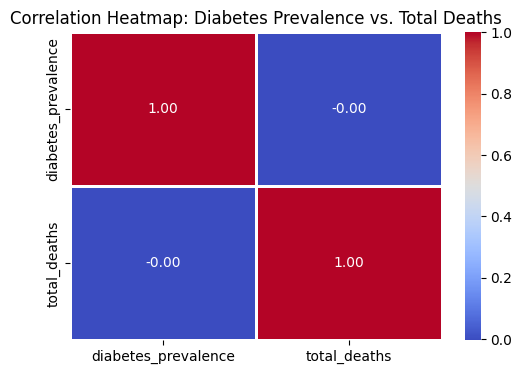

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns and calculating correlation
correlation_matrix = df[["diabetes_prevalence", "total_deaths"]].corr()

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

# Formatting the plot
plt.title("Correlation Heatmap: Diabetes Prevalence vs. Total Deaths")
plt.show()


Insights from the Heatmap
The value -0.00 suggests that diabetes prevalence does not directly impact total deaths in our dataset.

This could mean that:

Other factors (e.g., healthcare quality, other diseases) might influence total deaths more.

Diabetes prevalence might be high, but it is not necessarily a leading cause of death in the dataset.

---



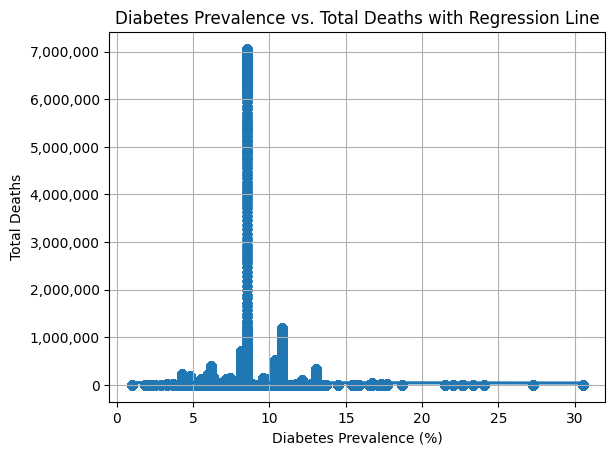

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="diabetes_prevalence", y="total_deaths", data=df)

# Format the y-axis to show large numbers properly
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("Total Deaths")
plt.title("Diabetes Prevalence vs. Total Deaths with Regression Line")
plt.grid(True)
plt.show()


1️⃣ High Concentration at Lower Diabetes Prevalence:

Most data points are clustered between 0% to 10% diabetes prevalence.

This suggests that in most countries, diabetes prevalence is relatively low.

2️⃣ Extreme Outliers in Total Deaths:

There is a very high spike in total deaths at around 10% diabetes prevalence.

This might indicate a country with a large population and high mortality rate (e.g., India, China, or the U.S.).

3️⃣ Lack of a Clear Trend:

The scatter plot does not show a strong linear relationship between diabetes prevalence and total deaths.

Total deaths might be influenced by other factors such as healthcare system, COVID-19 policies, or comorbidities.

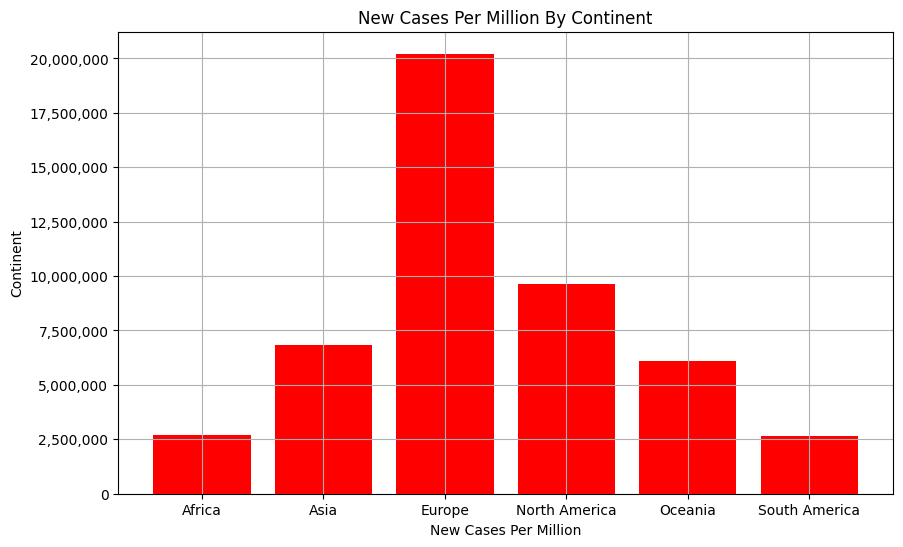

In [11]:
#Grouping Data by continent and summing 'new_cases_per_million'
df_grouped = df.groupby('continent', as_index=False)['new_cases_per_million'].sum()

#plotting
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['continent'], df_grouped['new_cases_per_million'], color='red')

# Fix: Get the current axis and format the y-axis numbers
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))  # Format with commas

#formatting the plot
plt.xlabel("New Cases Per Million")
plt.ylabel("Continent")
plt.title("New Cases Per Million By Continent")
plt.grid(True)

#show the plot
plt.show()

Europe had the most new cases per million

*   Europe had the most new cases per million with more than 20,000,000 cases
*   Africa and South America were the continents with the least new cases per million with 2,500,000 cases.
*   North America was the second highest continent with the most new cases per million






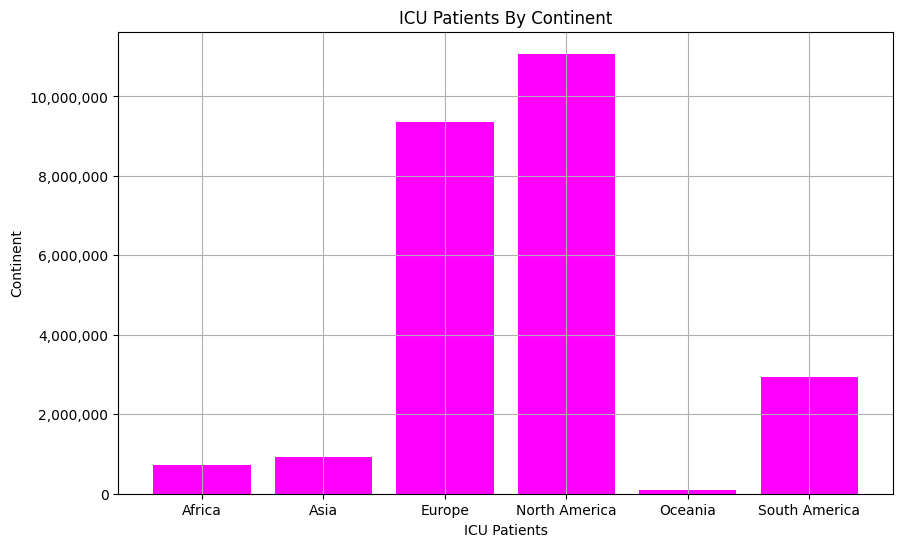

In [12]:

# Grouping data by continent and summing ICU patients
df_grouped = df.groupby('continent', as_index=False)['icu_patients'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['continent'], df_grouped['icu_patients'], color='magenta')


# Fix: Get the current axis and format the y-axis numbers
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))  # Format with commas

#formatting the plot
plt.xlabel("ICU Patients")
plt.ylabel("Continent")
plt.title("ICU Patients By Continent")
plt.grid(True)

#show the plot
plt.show()

In [13]:
#Let'start with converting the date column into datetime datatype
df["date"] = pd.to_datetime(df["date"])

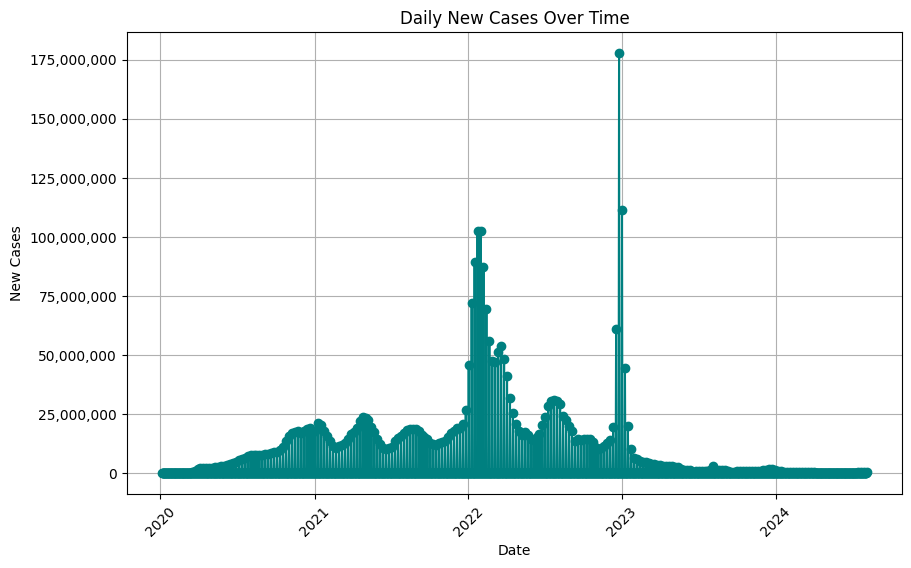

In [14]:
# Importing libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Aggregating new cases per day and plotting it

daily_cases = df.groupby("date")["new_cases"].sum().reset_index()
daily_cases

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(daily_cases["date"], daily_cases["new_cases"], color="teal", marker='o', linestyle='-')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New Cases Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Fix: Get the current axis and format the y-axis numbers
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))  # Format with commas

# Show the plot
plt.show()


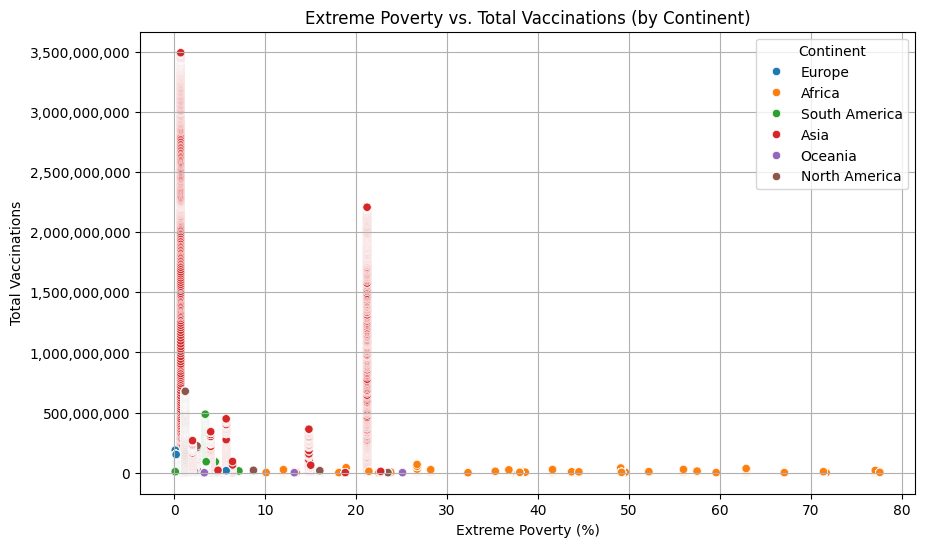

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Drop NaN values to avoid errors
df_filtered = df[["extreme_poverty", "total_vaccinations", "continent"]].dropna()

# Plot the scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x="extreme_poverty", y="total_vaccinations", hue="continent", data=df_filtered)

# Formatting the y-axis for better readability
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

# Labels and title
plt.xlabel("Extreme Poverty (%)")
plt.ylabel("Total Vaccinations")
plt.title("Extreme Poverty vs. Total Vaccinations (by Continent)")
plt.grid(True)
plt.legend(title="Continent")

# Show plot
plt.show()


🔍 Insights from the Scatterplot (Extreme Poverty vs. Total Vaccinations)


--A significant concentration of countries with low extreme poverty (0-10%) and high total vaccinations.

--These are likely developed nations (e.g., North America, Europe, parts of Asia).

--Countries with high extreme poverty (above 40%) tend to have lower total vaccinations.

--These are mostly African nations (orange dots in the higher poverty range).

--A few extreme cases where countries with low poverty still have low vaccinations.

--Possible vaccine hesitancy or access issues despite economic conditions.

--Asia (red) has a few extreme outliers with massive vaccination numbers.

--Likely driven by China and India, given their large populations.

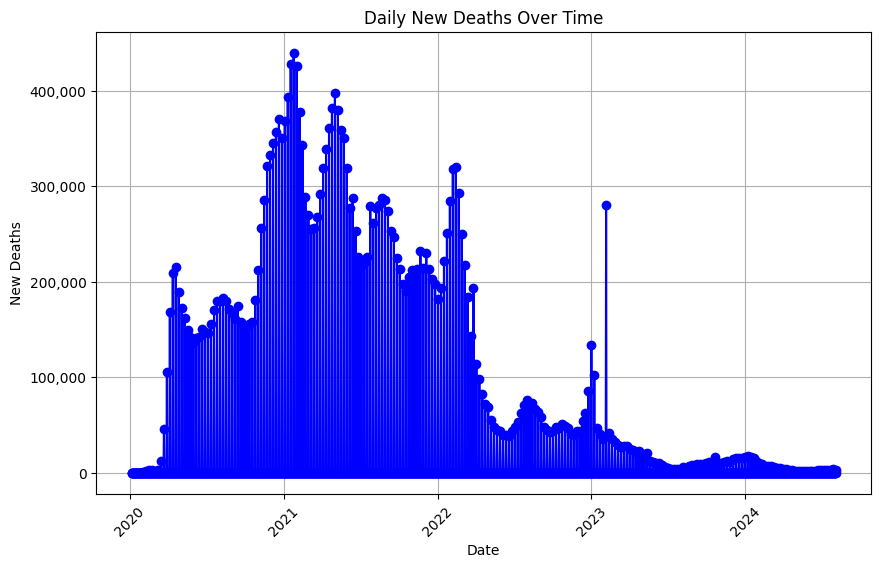

In [16]:
#importing the libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Aggregating deaths per day and plotting it
deaths_daily = df.groupby("date")["new_deaths"].sum().reset_index()
deaths_daily

#plotting the graph
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(deaths_daily["date"],deaths_daily["new_deaths"],color="blue",marker="o",linestyle="-")

#formatting the plots
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Daily New Deaths Over Time")
plt.xticks(rotation=45)
plt.grid(True)

#fix: get the current axis and format the y-axis numbers
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

#show the plot
plt.show()

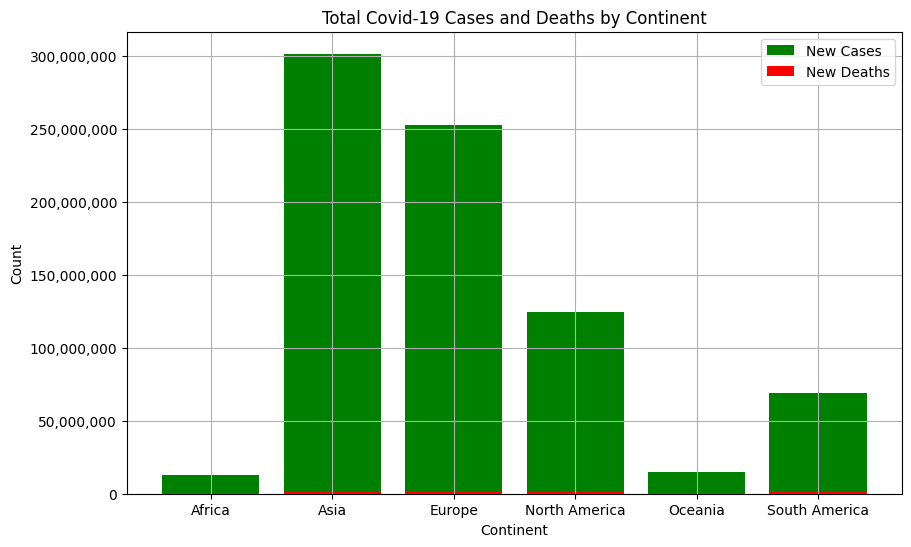

In [17]:
#Total Cases & Deaths by Continent
df_grouped = df.groupby('continent', as_index=False)[['new_cases', 'new_deaths']].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['continent'], df_grouped['new_cases'], color='green', label='New Cases')
plt.bar(df_grouped['continent'], df_grouped['new_deaths'], color='red', label='New Deaths')

#get the current axis and numbers by yaxis
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

#formatting
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Total Covid-19 Cases and Deaths by Continent')
plt.legend()
plt.grid(True)
plt.show()

#Insights from the Chart:

<h4>Asia and Europe had the highest total cases:<h4/>

--Asia: ~300 million cases

--Europe: ~250+ million cases

--Major contributors: India, China, Russia (Asia) and Italy, UK, Germany (Europe)


<h4>North America and South America also had significant cases:<h4/>

--North America: ~150 million cases

--South America: ~80 million cases

--Major contributors: USA, Brazil


<h4>Africa and Oceania had the lowest reported cases:<h4/>

--Likely due to lower testing rates, containment strategies, or data gaps

--Deaths (red bars) are very small compared to cases:

--Possible reasons: improved treatments, vaccinations, or underreporting

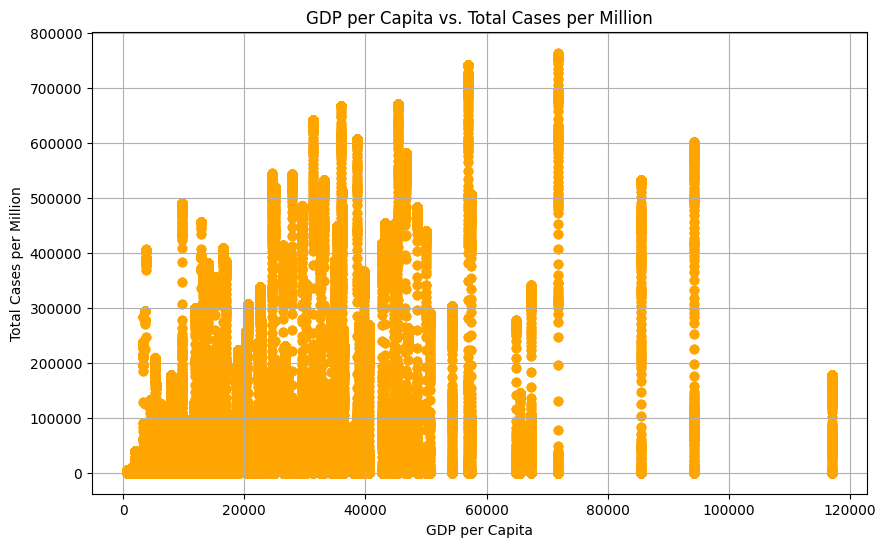

In [18]:
#Scatter Plot: GDP per Capita vs. Total Cases per Million
plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita'], df['total_cases_per_million'], color='orange', alpha=0.5)

#formatting the plot
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases per Million')
plt.title('GDP per Capita vs. Total Cases per Million')
plt.grid(True)
plt.show()

Insights from GDP per Capita vs. Total Cases per Million Scatter Plot-

--Positive Correlation: The graph suggests that wealthier countries (higher GDP per capita) tend to have more reported cases per million.

--Better Testing in High-GDP Countries: Countries with higher GDP likely had better testing infrastructure, leading to higher reported cases.

--Lower GDP Countries Have Fewer Cases: This may not mean lower spread but rather underreporting due to limited healthcare resources.

--Some High-GDP Outliers: A few rich countries show extremely high or low cases per million, possibly due to strict lockdowns or underreporting strategies.

<ipython-input-19-4e0c0b3e7a8c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP Category', y='CFR', data=cfr_by_gdp, order=["Low GDP", "Middle GDP", "High GDP"], palette=colors)


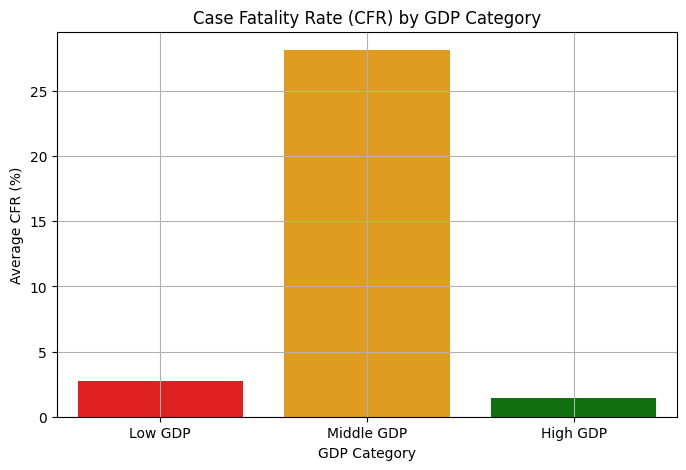

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no division by zero
df = df[df['total_cases'] > 0]

# Compute CFR
df['CFR'] = (df['total_deaths'] / df['total_cases']) * 100

# Categorize GDP per capita
def categorize_gdp(gdp):
    if gdp < 10000:
        return 'Low GDP'
    elif 10000 <= gdp <= 40000:
        return 'Middle GDP'
    else:
        return 'High GDP'

df['GDP Category'] = df['gdp_per_capita'].apply(categorize_gdp)

# Group by GDP category and calculate mean CFR
cfr_by_gdp = df.groupby("GDP Category")["CFR"].mean().reset_index()

# Define colors manually
colors = {"Low GDP": "red", "Middle GDP": "orange", "High GDP": "green"}

# Plot CFR by GDP category
plt.figure(figsize=(8,5))
sns.barplot(x='GDP Category', y='CFR', data=cfr_by_gdp, order=["Low GDP", "Middle GDP", "High GDP"], palette=colors)

plt.xlabel("GDP Category")
plt.ylabel("Average CFR (%)")
plt.title("Case Fatality Rate (CFR) by GDP Category")
plt.grid(True)
plt.show()


In [20]:
#Aged 70+ vs. Total Deaths
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Check null values
print('null values in ages_70_older:',df["aged_70_older"].isnull().sum())
print('null values in total_deaths:',df["total_deaths"].isnull().sum())
print('null values in continent:',df['continent'].isnull().sum())

#drop NAN values to avoid errors
df_filtered = df[["aged_70_older","total_deaths",'continent']].dropna()


null values in ages_70_older: 75035
null values in total_deaths: 0
null values in continent: 19871


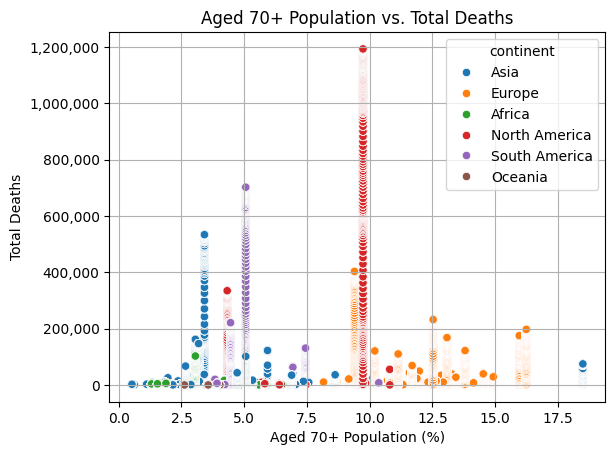

In [21]:
#plotting the plot
sns.scatterplot(x="aged_70_older", y="total_deaths", data=df_filtered, hue = "continent")

#fix: get the current axis and the yaxis number
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0f}"))

#formatting the plot
plt.xlabel("Aged 70+ Population (%)")
plt.ylabel("Total Deaths")
plt.title("Aged 70+ Population vs. Total Deaths")
plt.grid(True)
plt.show()

🔍 Key Insights from the Plot
The cluster around ~5% aged 70+

--Most of the data points here seem to belong to Asia (blue) and Africa (green).

--These regions likely have a lower proportion of elderly population but still contribute to a significant number of total deaths.

--Europe and North America (Higher Aged 70+ Population, Higher Deaths)

--Countries with 10%+ aged 70+ population are mostly in Europe (red) and North America (purple).

--These regions show a strong correlation between an aging population and higher total deaths.

--Anomaly at ~7.5% Aged 70+




In [22]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Select relevant columns ( Predicting Total Deaths)
df_filtered = df[['aged_70_older', 'diabetes_prevalence', 'hospital_beds_per_thousand', 'gdp_per_capita', 'total_deaths']].dropna()

#Features(X) and Target Variable(y)
X = df_filtered.drop('total_deaths', axis=1)
y = df_filtered['total_deaths']

#Training and Testing Data(80 Percent Train and 20 % Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Predictions
y_pred = model.predict(X_test)

In [26]:
#Calculate the Error score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 201848827507.79636
R-squared: 0.0012685522186600684


<h4>The model is performing very poorly so now we will check the correlation between the variables to know whether they share a linear relationship or not.<h4/>

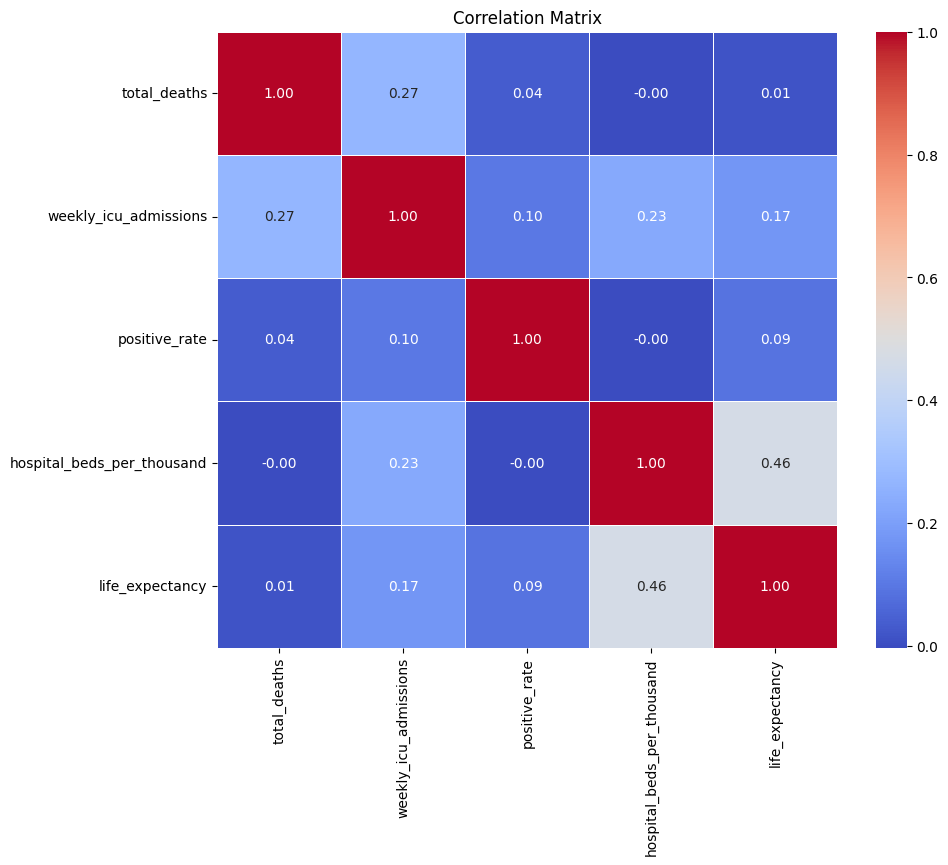

In [27]:
#plotting the correlation matrix
correlation_matrix = df[['total_deaths', 'weekly_icu_admissions', 'positive_rate',
    'hospital_beds_per_thousand', 'life_expectancy']].corr()

#using seaborn to plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths= 0.5)
plt.title('Correlation Matrix')
plt.show()

Here’s an explanation of the relationships in correlation heatmap:  

### 🔍 **Key Observations**  
Correlation values range from **-1** (strong negative correlation) to **1** (strong positive correlation). Closer to **0** means weak or no correlation.

---

### **1️⃣ Total Deaths vs. Other Variables**
- **Total Deaths & Weekly ICU Admissions (0.27)**  
  🔹 Moderate positive correlation.  
  🔹 More ICU admissions could indicate severe cases, which might lead to higher deaths.  
   
- **Total Deaths & Positive Rate (0.04)**  
  🔹 Very weak correlation.  
  🔹 A higher positive rate doesn’t strongly correlate with total deaths, possibly because death rates depend on healthcare systems, not just infection rates.  

- **Total Deaths & Hospital Beds per Thousand (-0.00)**  
  🔹 Essentially no correlation.  
  🔹 This suggests that hospital bed availability alone doesn’t predict total deaths. Other factors (ventilators, ICU care, staff availability) might be more crucial.  

- **Total Deaths & Life Expectancy (0.01)**  
  🔹 Almost no correlation.  
  🔹 This means total deaths are not significantly tied to the overall life expectancy of a country.

---

### **2️⃣ Weekly ICU Admissions vs. Other Variables**
- **ICU Admissions & Positive Rate (0.10)**  
  🔹 Weak positive correlation.  
  🔹 A slight link suggests that more infections might lead to more ICU cases, but not strongly. Other factors (like variants, vaccination) likely play a role.  

- **ICU Admissions & Hospital Beds per Thousand (0.23)**  
  🔹 Weak positive correlation.  
  🔹 More hospital beds might support ICU care but don’t necessarily drive more admissions.  

- **ICU Admissions & Life Expectancy (0.17)**  
  🔹 Weak positive correlation.  
  🔹 This might suggest that better healthcare infrastructure (linked to life expectancy) enables ICU admissions.

---

### **3️⃣ Positive Rate vs. Other Variables**
- **Positive Rate & Hospital Beds per Thousand (-0.00)**  
  🔹 No correlation.  
  🔹 Testing rates and hospital bed availability are independent factors.  

- **Positive Rate & Life Expectancy (0.09)**  
  🔹 Weak correlation.  
  🔹 Countries with higher life expectancy might test more, but it’s not a strong link.

---

### **4️⃣ Hospital Beds per Thousand vs. Life Expectancy (0.46)**
  🔹 Moderate positive correlation.  
  🔹 Countries with more hospital beds tend to have better healthcare, leading to longer life expectancy.

---

### **🧐 Insights & Next Steps**
- The **most notable correlation** is between **hospital beds per thousand & life expectancy (0.46)**—countries with better healthcare facilities tend to have higher life expectancy.  
- **Total deaths don’t have strong correlations** with other factors—this means deaths are influenced by multiple variables (healthcare quality, policies, variants) rather than just one factor.  
- **ICU admissions show some relation to total deaths (0.27)**, but it’s not very strong.  


In [28]:
#Let's Try Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#select relevant features
features = [ 'weekly_icu_admissions', 'positive_rate',
    'hospital_beds_per_thousand', 'life_expectancy']
target = ["total_deaths"]

#drop rows with missing values
df_filtered = df.dropna(subset=features + target)  # If target is already a list


#split the data
X = df_filtered[features]
y = df_filtered[target]

# If y is a DataFrame, convert it to a 1D array
y = y.values.ravel()

#Training and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state  = 42 )
rf_model.fit(X_train, y_train)

#Predictions
y_pred = rf_model.predict(X_test)

Mean Squared Error: 225031091.90527508
R2 Score : 0.8893807856289476


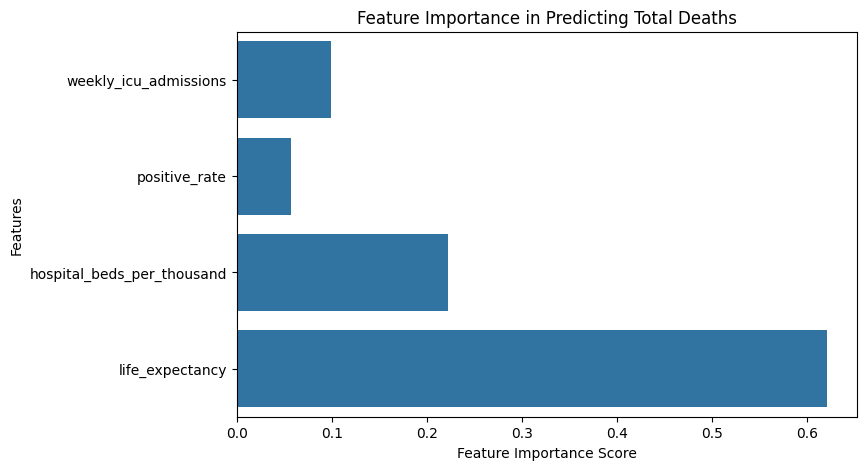

In [30]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print the output
print(f'Mean Squared Error: {mse}')
print(f'R2 Score : {r2}')

# Plot Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=features)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Total Deaths")
plt.show()


##PROPHET MODEL

In [31]:
#installing and importing prophet
!pip install prophet
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5onvuiuz/jw0u31x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5onvuiuz/qotcvd_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72487', 'data', 'file=/tmp/tmp5onvuiuz/jw0u31x_.json', 'init=/tmp/tmp5onvuiuz/qotcvd_2.json', 'output', 'file=/tmp/tmp5onvuiuz/prophet_modelrtbfx7fi/prophet_model-20250404090533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:05:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:05:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
834 2023-03-27  3.174775e+07  2.771348e+06  6.133986e+07
835 2023-03-28  3.183566e+07  1.865679e+06  6.058754e+07
836 2023-03-29  3.130544e+07  1.479519e+06  5.870345e+07
837 2023-03-30  3.188295e+07  2.131644e+06  6.169778e+07
838 2023-03-31  3.110199e+07  9.991255e+05  5.950799e+07


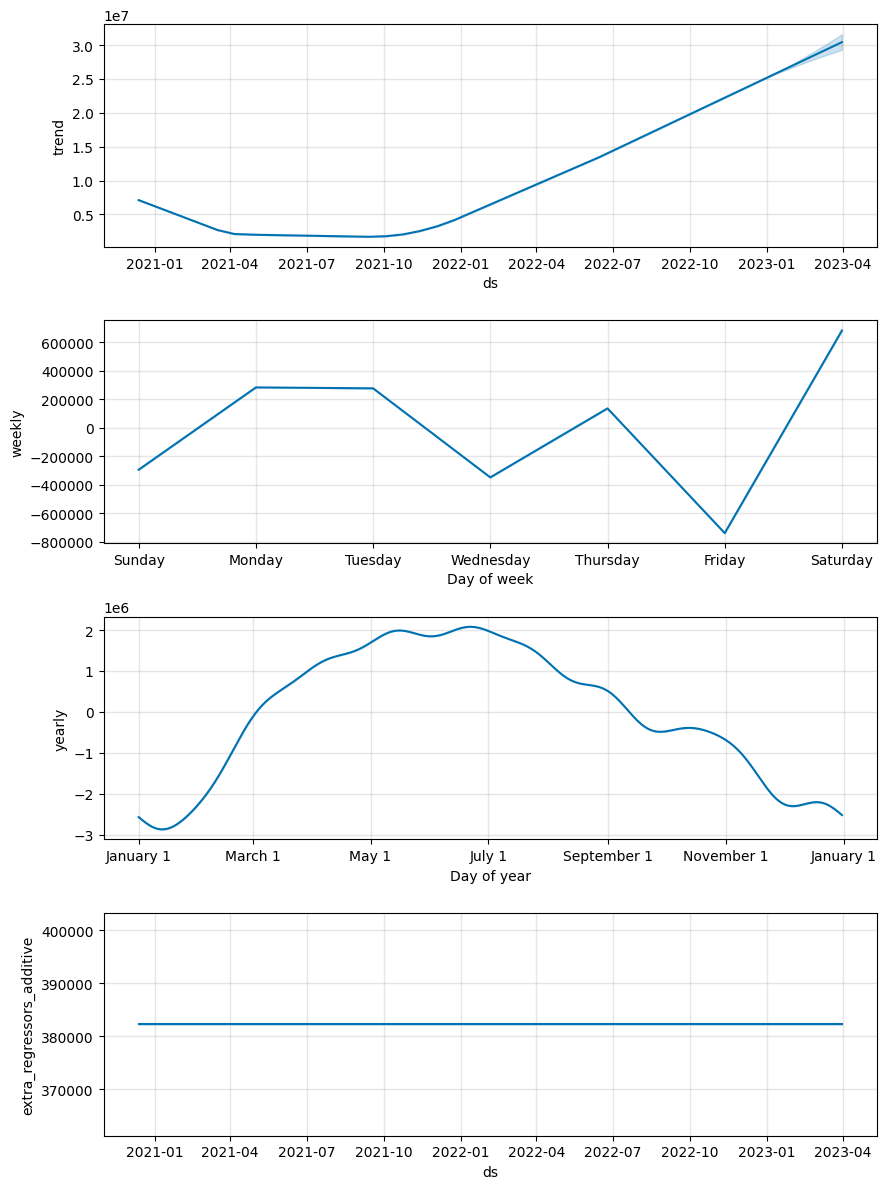

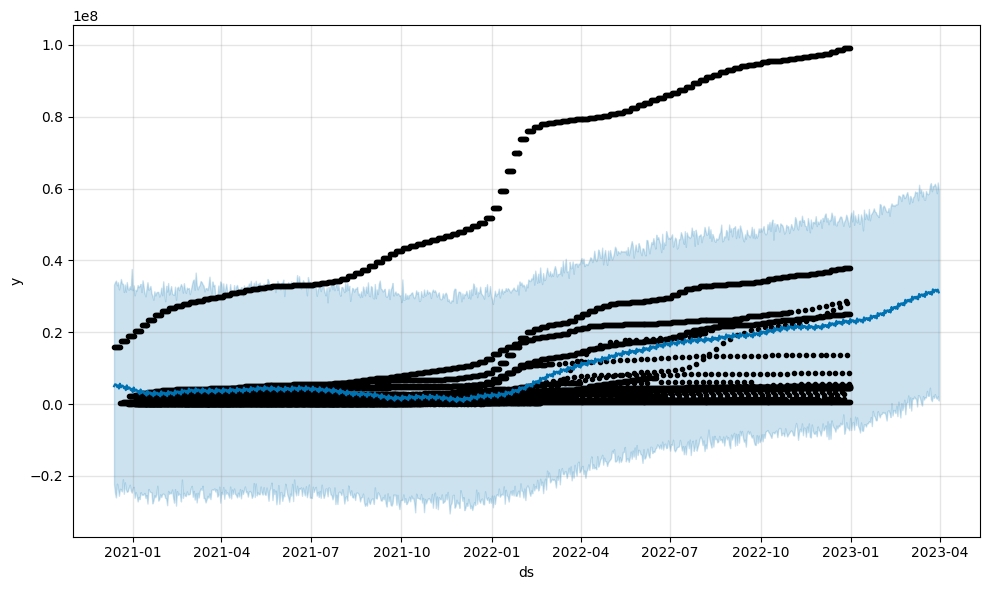

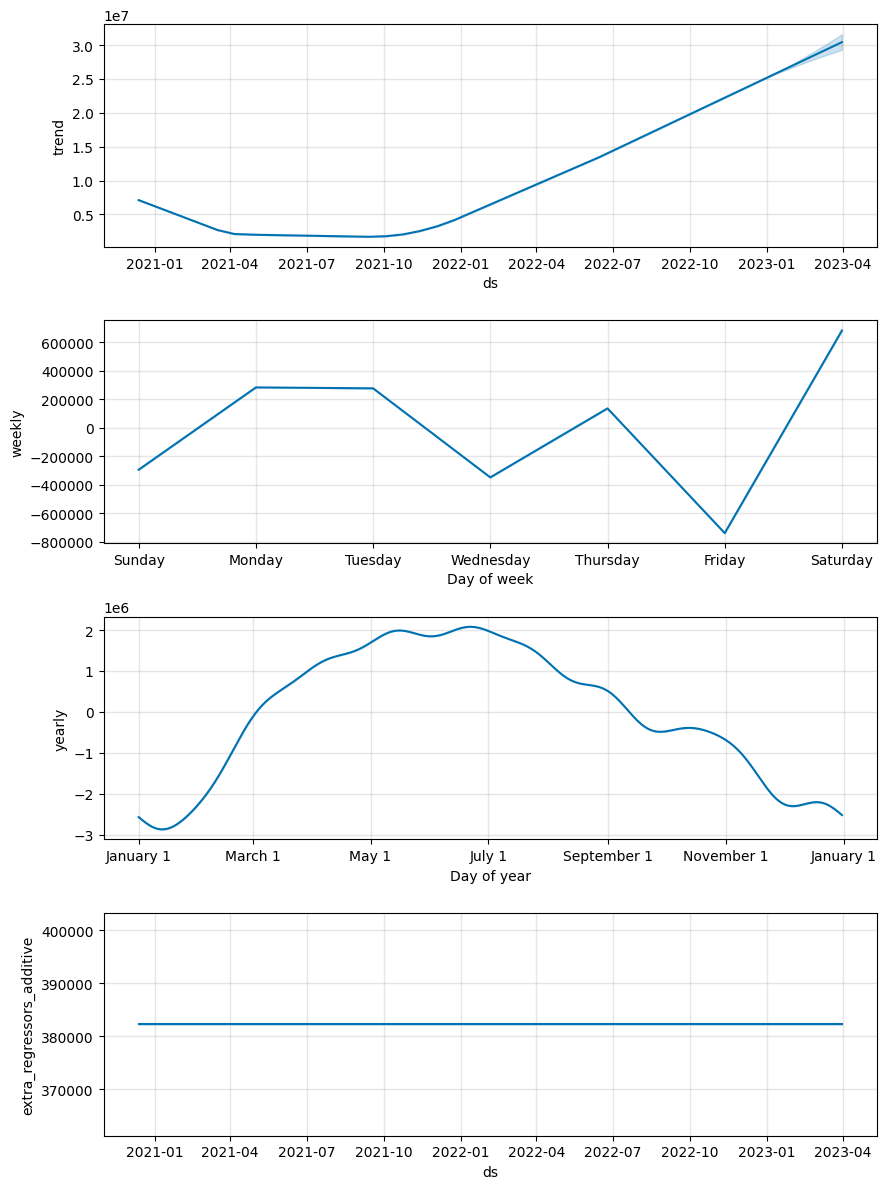

In [32]:

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Select relevant columns for Prophet
df_prophet = df[['date', 'total_cases', 'reproduction_rate', 'stringency_index',
                 'people_fully_vaccinated_per_hundred', 'hosp_patients_per_million']].dropna()

# Rename columns for Prophet
df_prophet.columns = ['ds', 'y', 'reproduction_rate', 'stringency_index',
                      'vaccination_rate', 'hospitalization_rate']

# Initialize Prophet model with optimized settings
model = Prophet(
    changepoint_prior_scale=0.2,  # More flexible trend adaptation
    interval_width=0.95,          # Wider confidence interval
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Add external regressors
model.add_regressor('reproduction_rate')
model.add_regressor('stringency_index')
model.add_regressor('vaccination_rate')
model.add_regressor('hospitalization_rate')

# Fit the model
model.fit(df_prophet)

# Create a dataframe for future predictions (next 90 days)
future = model.make_future_dataframe(periods=90)

# Extend external regressors for future dates (use last available values)
latest_values = df_prophet.iloc[-1]
future['reproduction_rate'] = latest_values['reproduction_rate']
future['stringency_index'] = latest_values['stringency_index']
future['vaccination_rate'] = latest_values['vaccination_rate']
future['hospitalization_rate'] = latest_values['hospitalization_rate']

# Generate forecast
forecast = model.predict(future)

# Show last few predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot forecast and components
model.plot(forecast)
model.plot_components(forecast)


#INSIGHTS
**1.Overall Trend (Top Plot):**

The plot shows the underlying long-term trend identified by the model, removing seasonal effects.

Insight:

The trend starts very low in early 2020, increases significantly through 2021 and 2022, and then begins to level off or plateau from 2023 into 2024 and 2025. This suggests the model captured an initial period of rapid growth followed by a stabilization phase in the data it was trained on. The y-axis scale (reaching up to 1.2e7 or 12 million) indicates the trend component contributes significantly to the overall magnitude of the forecast.
<hr>
**2.Weekly Seasonality (Middle Plot):**

This plot illustrates the typical pattern within a week.

Insight:

The forecast shows a clear downward trend from Sunday/Monday through Saturday. This often reflects reporting patterns rather than actual transmission dynamics. For example, there might be delays in reporting over weekends, leading to lower reported numbers on Saturdays and Sundays, and catch-up reporting leading to peaks early in the week (though this plot shows a peak on Sunday/start of the week and decline thereafter). The effect size (ranging from roughly +20,000 to -20,000) indicates the day of the week has a noticeable impact on the forecast.
<hr>
**3.Yearly Seasonality (Bottom Plot):**

This plot shows the typical pattern repeated each year.

Insight:

The model identifies a strong seasonal pattern throughout the year. The forecast tends to be highest around March/April/May and lowest around November/December, before rising again into the new year. This could reflect seasonal factors influencing transmission (like weather, holidays, school schedules) that were present in the training data. The magnitude (ranging from roughly +300,000 to -400,000) suggests this yearly cycle has a very significant impact on the overall forecast value.

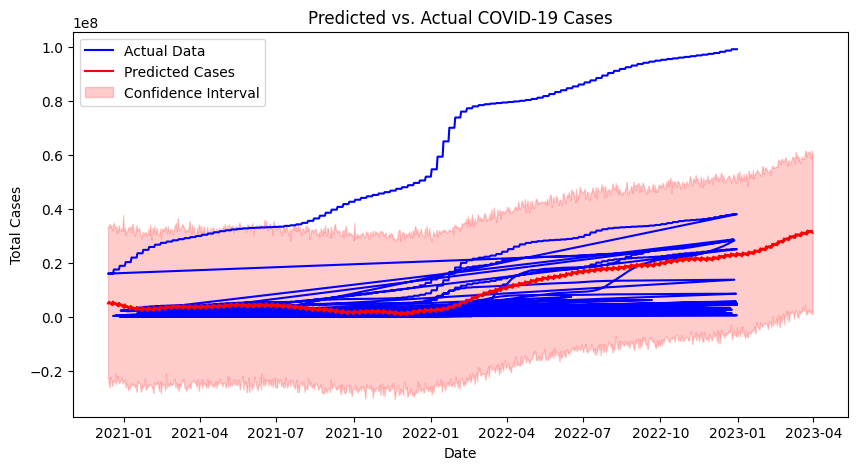

In [33]:

# 📌 1️⃣ Predicted vs. Actual Plot
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], 'b', label="Actual Data")
plt.plot(forecast['ds'], forecast['yhat'], 'r', label="Predicted Cases")
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color='red', alpha=0.2, label="Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Predicted vs. Actual COVID-19 Cases")
plt.legend()
plt.show()

###Model Valuation
We can check the residuals (the difference between the actual and predicted values) to see how well the model is fitting the data. A good model will have residuals that are randomly distributed (no clear patterns). This is an important step for model validation.

Actual data length: 12861
Filtered forecast length: 749


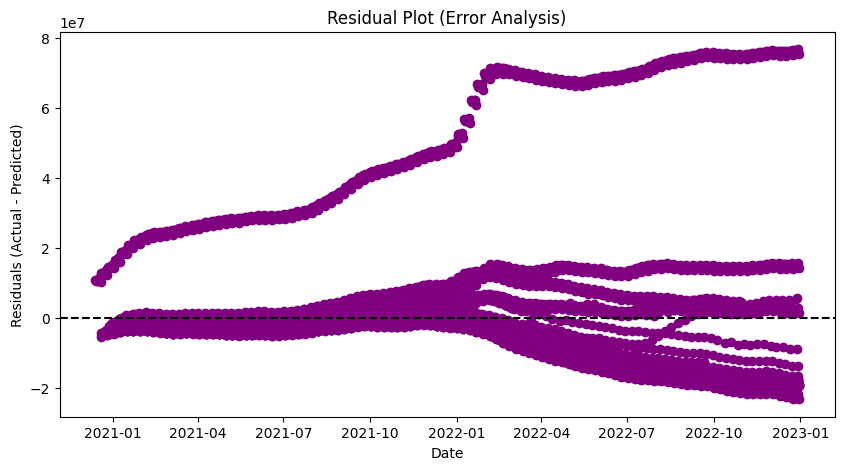

In [34]:
# 📌 2️⃣ Residual Plot (Errors in Predictions)
# Ensure forecast only contains dates that exist in actual data
forecast_actual = forecast[forecast['ds'].isin(df_prophet['ds'])]

# Check lengths again
print(f"Actual data length: {len(df_prophet)}")
print(f"Filtered forecast length: {len(forecast_actual)}")

# Merge actual and predicted data to ensure alignment
df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate residuals correctly
residuals = df_merged['y'] - df_merged['yhat']
# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(df_prophet['ds'], residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Error Analysis)")
plt.show()


**📌 Residuals Plot (Forecast Errors)**-

Residuals are consistently negative, meaning the model underpredicts cases.

Sharp downward trend in residuals indicates systematic bias in predictions.

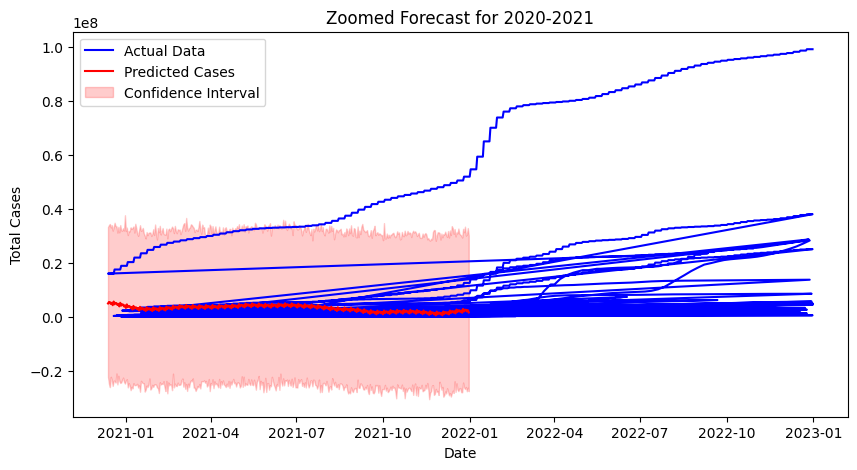

In [35]:
# 📌 3️⃣ Zoomed Forecast for 2020-2021
plt.figure(figsize=(10, 5))
mask = (forecast['ds'] >= "2020-01-01") & (forecast['ds'] <= "2021-12-31")
plt.plot(df_prophet['ds'], df_prophet['y'], 'b', label="Actual Data")
plt.plot(forecast.loc[mask, 'ds'], forecast.loc[mask, 'yhat'], 'r', label="Predicted Cases")
plt.fill_between(forecast.loc[mask, 'ds'], forecast.loc[mask, 'yhat_lower'],
                 forecast.loc[mask, 'yhat_upper'], color='red', alpha=0.2, label="Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Zoomed Forecast for 2020-2021")
plt.legend()
plt.show()
